<h1><b>Individual Project Planning</h1>

In [138]:
#loading in required libraries/packages
library(tidyverse)

In [139]:
# loading player data into players df
players <- read_csv("data/players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


<h2><b>Player Data Set Information:</b></h2>

<i><b>Variable Characteristics:

* experience: Categorical/chr
* subscribe: Boolean/lgl
* hashedEmail: String/chr
* played_hours: Numerical/dbl
* name: String/chr
* gender: String/chr
* age: Numerical/dbl

<i><b>Variable Semantics:

* experience: qualitative measure of game familiarity
* subscribe: shows if participant is subscribed to a game-related newsletter 
* hashedEmail: email converted through a hash function
* played_hours: total hours played for study
* name: first name of participant
* gender: gender of participant
* age: age of participant

<i><b>Summary Statistics:

- Number of observations: 196
- Number of variables: 7

In [140]:
# getting counts for each experience level
experience_count <- players |>
group_by(experience) |>
summarize(n()) 

experience_count 

experience,n()
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


In [141]:
# getting counts for listed genders
gender_count <- players |>
group_by(gender) |>
summarize(gender_count = n()) 

gender_count

gender,gender_count
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


<i><b>Data Issues:

<u>Potential issues in the data set:

- Size of data set is limited to 196 unique participants.
- Experience labels are vague, no clear indication of what metric or criteria is being used to determine label value.
- A number of participants have no hours logged.
- Data set largely consisted of males around 20 years old.

<u>Potential issues outside the data set:

- With knowledge of the study, participant behaviours including session play time, may have been affected.

<h2><b>Question:</h2>

<p>
The broad question we plan on addressing is 2) "Which "kinds" of players are most likely to contribute a large amount of data?" When distinguishing between different "kinds" of players, a prominent metric to examine would be age, given its frequent relevance to human-technology interactions. As such, we intend to investigate whether age can be used as an accurate predictor for the total amount of play time an amateur participant will contribute. Using the hours played and age (years) data in the given set, predictions can be made using an appropriate model. Depending on model accuracy, we can critically evaluate the efficacy of age as a predictive variable for hours played. Aside from filtering for experience, little additional wrangling will be required.
</p>


<h2><b>Exploratory Data Analysis and Visualizations:</h2>

<h3><b>Sample of player data set:</h3>

In [17]:
# Printing top 6 rows from players df
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


<h3><b>Mean values for Numeric Variables:</h3>

In [20]:
mean_table <- players |>
select(played_hours, Age) |>
na.omit() |>
map_df(mean)

mean_table

played_hours,Age
<dbl>,<dbl>
5.904639,20.52062


<h3><b>Exploratory Plots:</h3>

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


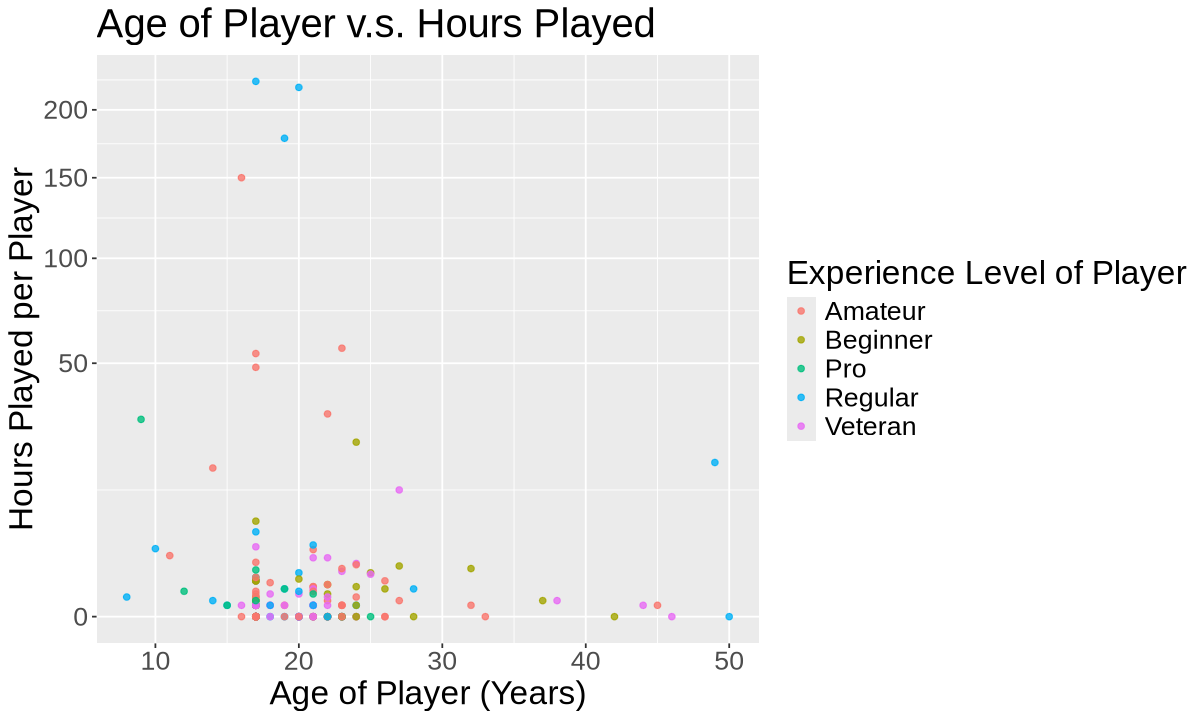

In [96]:
# Setting plot size 
options(repr.plot.width = 10, repr.plot.height = 6)

# Creating scatterplot to assess age against hours played relationship
player_plot <- players |>
ggplot(aes(x = Age, y = played_hours, color = experience)) +
geom_point(alpha = 0.8) +
labs(x = "Age of Player (Years)", y = "Hours Played per Player", color = "Experience Level of Player") + 
scale_y_continuous(limit = c(-2, 100)) +
scale_y_continuous(trans = "sqrt") +
theme(text = element_text(size = 20)) +
ggtitle("Age of Player v.s. Hours Played")

player_plot

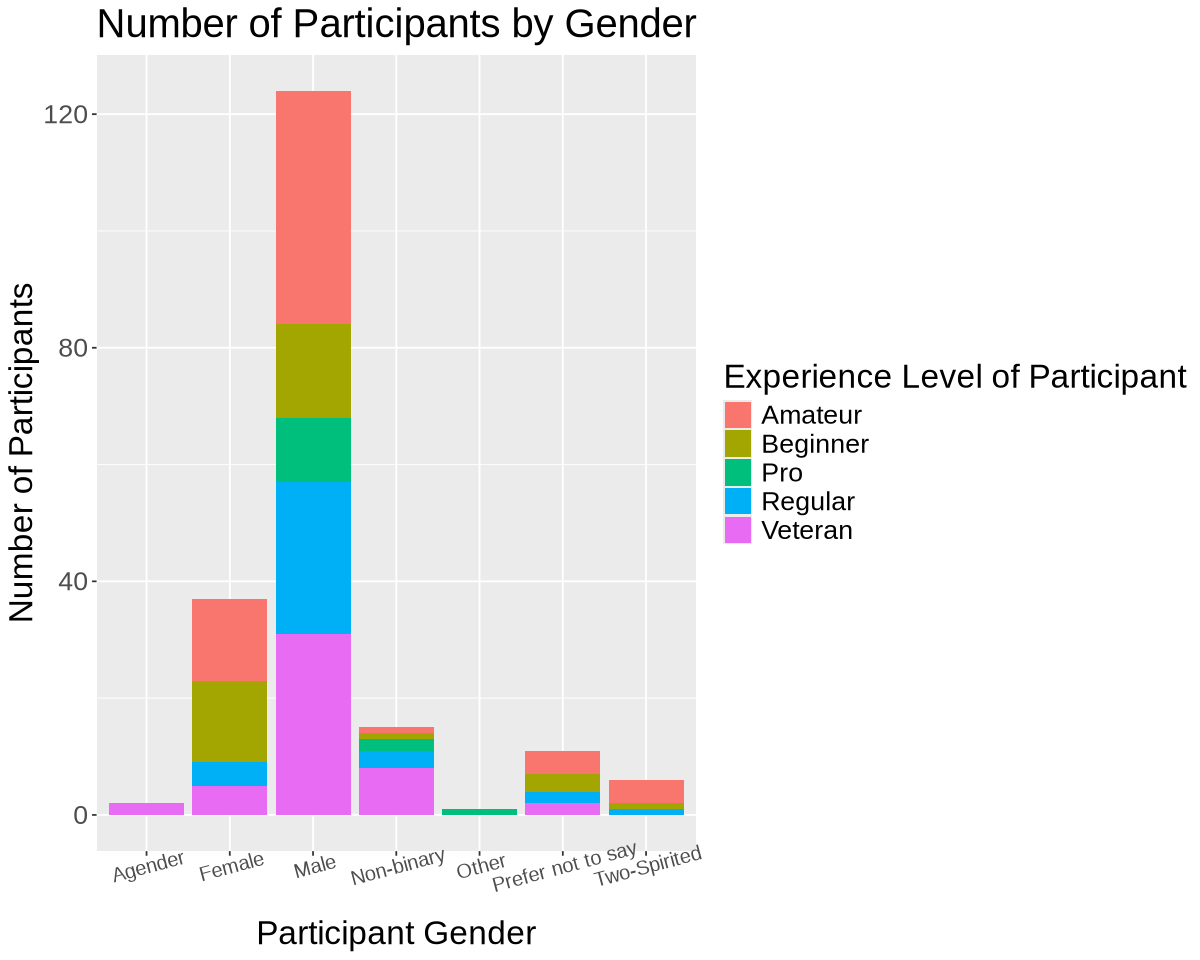

In [99]:
options(repr.plot.width = 10, repr.plot.height = 8)

# Creating barplot to visualize participants of each gender
player_plot <- players |>
ggplot(aes(x = gender, fill = experience)) +
geom_bar(stat = "count", position = position_stack()) +
labs(x = "Participant Gender", y = "Number of Participants", fill = "Experience Level of Participant") + 
theme(text = element_text(size = 20), axis.text.x = element_text(angle = 15, size = 12)) +
ggtitle("Number of Participants by Gender")
player_plot

experience,avg_age
<chr>,<dbl>
Amateur,20.25397
Beginner,21.65714
Pro,16.92308
Regular,20.60000
Veteran,20.95833


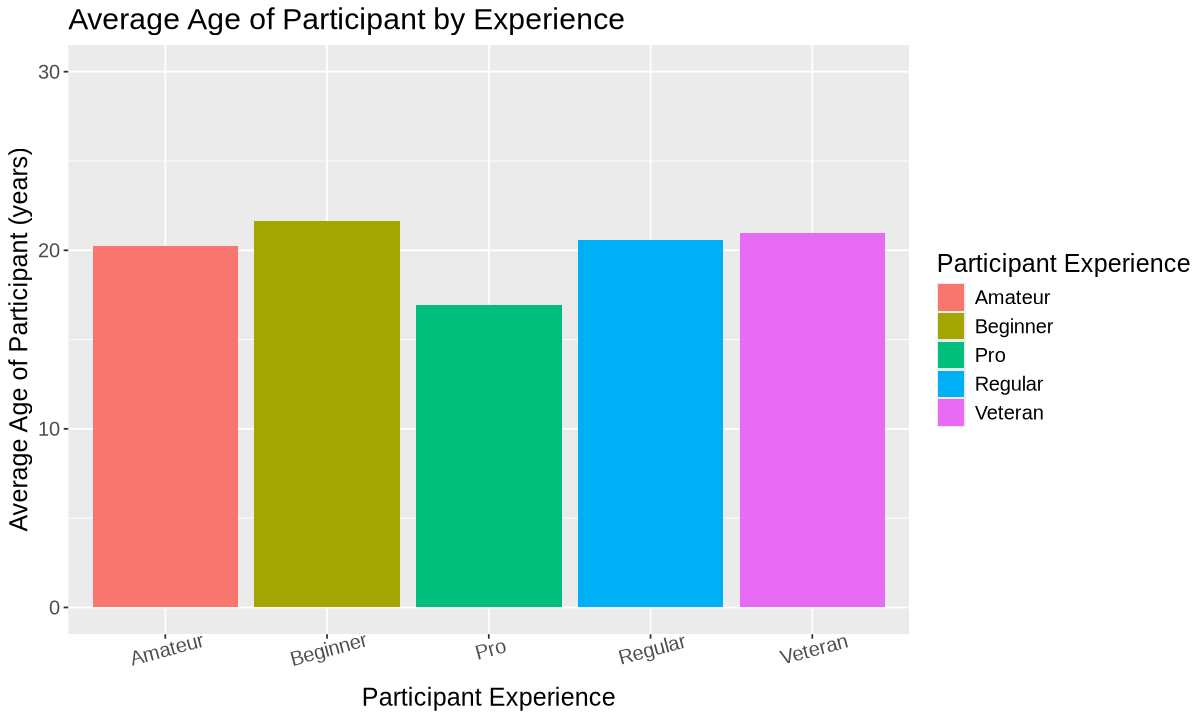

In [137]:
options(repr.plot.width = 10, repr.plot.height = 6)

# Grouping by experience, getting average age of each class
avg_age_by_experience <- players |>
na.omit() |>
group_by(experience) |>
summarize(avg_age = mean(Age))

# print table
avg_age_by_experience

# creating bar plot to visualize average age of each experience class
age_by_exp_plot <- avg_age_by_experience |>
ggplot(aes(x = experience, y = avg_age, fill = experience)) +
geom_bar(stat = "identity", position = position_stack()) +
labs(x = "Participant Experience", y = "Average Age of Participant (years)", fill = "Participant Experience") + 
theme(text = element_text(size = 15), axis.text.x = element_text(angle = 15, size = 12)) +
ggtitle("Average Age of Participant by Experience") + 
scale_y_continuous(limit = c(0, 30))
age_by_exp_plot

<h2><b>Methods</b></h2>

Our main question, how effective and accurate age (years) is at predicting the hours an amateur participant will contribute to the study, involves predicting a numerical value (hours played) for new participants using currently available data. This makes regression an ideal choice for the project. 

Assumptions: 

- Data set is representative of future players and participants. 
- (KNN) Amateur players with similar ages will contribute similar played hours.
- Predictions and prediction accuracy from model are abstractable beyond just amateur players.
- (Lin Reg) Linear relationship between variables.

Limitations:

- Using only one predictor variable, fails to account for other, potentially stronger factors.
- Size of data set is limited, accuracy may subsequently be affected.
 
Cross-validation will be done on 5 validation sets to select the most appropriate k value for a knn-based regression model. Values from k = 2 to k = 15 will be tested.

An initial split will be created in the data set, with a 70-30 proportion between training and testing data, with hours_played as our strata variable.

Comparison between the KNN model's mean RMSPE and a linear regression model's mean RMSPE will be conducted to determine the more accurate model.
Additionally, visual evaluation on an age against hours played plot will be done to determine linearity of their relationship, and whether linear regression is appropriate for the problem.